# Week 1 Notebook 3
## Exploratory Data Analysis: Univariate and bivariate Distributions


### 1  Load data

We will investigate a subset of the spotify data for quick EDA in class. 

In [1]:

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
sns.set_theme(style="whitegrid", context="talk")
DATA_DIR = Path("../../") / "data"

random_seed=42

tracks = pd.read_csv(DATA_DIR / 'spotify_track_ratings.csv')
sample = tracks.sample(50_000, random_state=random_seed)
print(f'Original rows: {len(tracks):,} | Sample: {len(sample):,}')
sample[['danceability','energy','valence','tempo','mode','popularity']].describe()

# source of data: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

Original rows: 114,000 | Sample: 50,000


,danceability,energy,valence,tempo,mode,popularity
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.565963,0.641456,0.473878,122.211438,0.636280,33.256920
std,0.174015,0.251491,0.259784,30.015696,0.481074,22.283949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,0.256750,99.290000,0.000000,17.000000
50%,0.579000,0.685000,0.464000,122.037000,1.000000,35.000000
75%,0.694000,0.853000,0.683000,140.109250,1.000000,50.000000
max,0.985000,1.000000,0.992000,243.372000,1.000000,98.000000


From the descriptive statiscs, we can already see some features in this dataset. If these numbers are insufficient, we can continue to visualize these features. 

### 2  Continuous variables

There are a few options for visualizing the distributions of continuous variables. Here we cover the most common ones, namely, histograms, kernel density estimates (KDE), box plot, and violin plot.

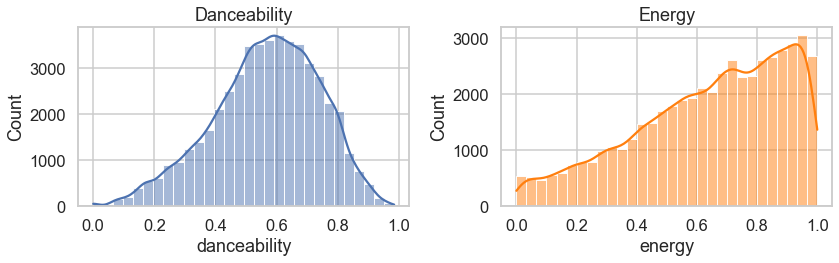

In [2]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(sample['danceability'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Danceability')
sns.histplot(sample['energy'], bins=30, kde=True, color='tab:orange', ax=ax[1])
ax[1].set_title('Energy')
plt.tight_layout()


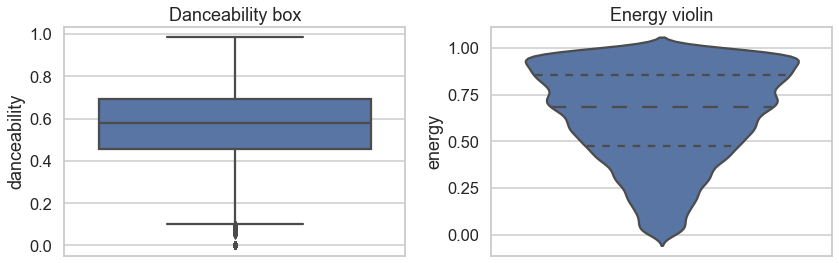

In [3]:

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(y=sample['danceability'], ax=ax[0]); ax[0].set_title('Danceability box')
sns.violinplot(y=sample['energy'], ax=ax[1], inner='quartile'); ax[1].set_title('Energy violin')
plt.tight_layout()


### 3  Categorical variable

For categirical variables, the options are somewhat limited that depends on the number of categories. For instance, for binary variables, there is almost no need for univariate visualization. 

I want to add a few visualization for categorical variables. Here the visualization is on univariate variables, meaning that only one variable will be used in one plot. I think we can draw a bar plot for categorical variables. Can you prepare a few visualizations using the spotify data?m


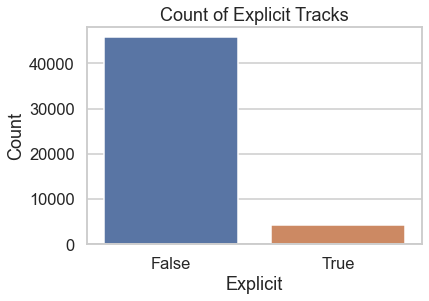

In [4]:
# Bar plot for 'explicit' (binary categorical)
plt.figure(figsize=(6,4))
sns.countplot(x='explicit', data=sample)
plt.title('Count of Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

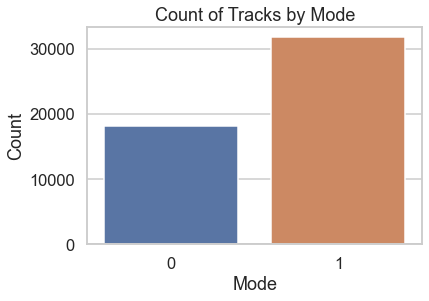

In [5]:

# Bar plot for 'mode' (categorical: major/minor)
plt.figure(figsize=(6,4))
sns.countplot(x='mode', data=sample)
plt.title('Count of Tracks by Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()


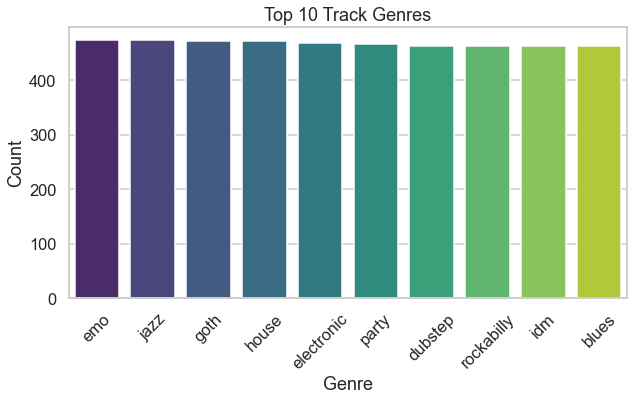

In [6]:

# Bar plot for top 10 'track_genre'
plt.figure(figsize=(10,5))
top_genres = sample['track_genre'].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Track Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 1  Bivariate distributions

#### 1.1 Continous v.s. continuous

A scatterplot is a powerful tool to visualize the relationship between two continuous variables. In a scatterplot, each point corresponds to an observation, and the coordinates of the point are determined by the two variables. We sometimes want to add a line or a smoothed curve to show trend. 

> **Tip** Transparency and careful choice of colors can drastically improves the legibility of your visualization.

Text(0.5, 1.0, 'Energy vs Danceability')

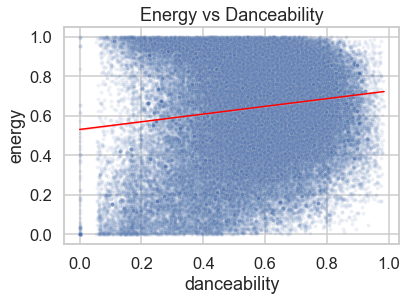

In [7]:
sns.scatterplot(data=tracks, x='danceability', y='energy', alpha=0.1, s=15)
sns.regplot(data=tracks, x='danceability', y='energy',
            scatter=False, color='red', line_kws={'linewidth':1.5})
plt.title('Energy vs Danceability')

#### 1.2  Hexbin 

When there are too many observations, a scatterplot might be infeasible to visualize the data. As an alternative, we can draw a heat-map kind of plots while still keeping the coordinates legibile. 

C:\Users\xiucai admin\AppData\Local\Temp\ipykernel_4128\2507875417.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(); cb.set_label('count')


Text(0.5, 1.0, 'Energy vs Tempo (hexbin)')

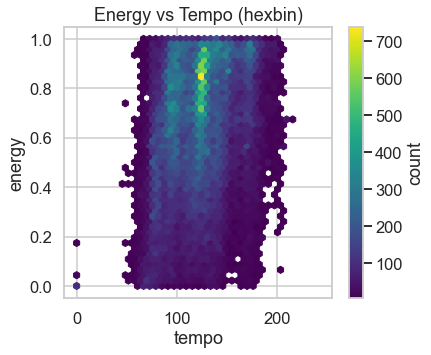

In [8]:
plt.figure(figsize=(6,5))
plt.hexbin(tracks['tempo'], tracks['energy'], gridsize=40, cmap='viridis', mincnt=5)
cb = plt.colorbar(); cb.set_label('count')
plt.xlabel('tempo'); plt.ylabel('energy')
plt.title('Energy vs Tempo (hexbin)')

#### 1.3 Joint plot

We can get creative and include the visualizations of both univariate distributions and bivariate distributions in the same plot. 

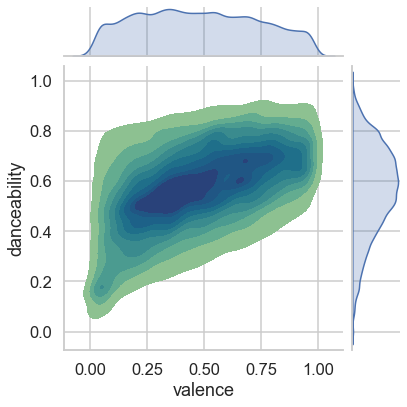

In [9]:

sns.jointplot(data=tracks, x='valence', y='danceability',
              kind='kde', fill=True, height=6, cmap='crest')


### 2  Continous v.s. categorical

Categorical variables are natural indicators to create groups. We can thus apply the visualizations of univariate distributions to each of the groups defined by the categorical variable. In the plot below, we can see the violin plot and a new swarmplot for each of the two groups. The swarmplot displays every data point from a numeric-vs-categorical relationship, but positions points so they don’t overlap. Similar ideas of visualizing every single data point can be traced to the stem-leaf plot. 

/var/folders/7k/pmrkdmm532g7zc20cgygtd4w0000gn/T/ipykernel_7616/3871635254.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='mode', y='valence', inner=None, palette='pastel')


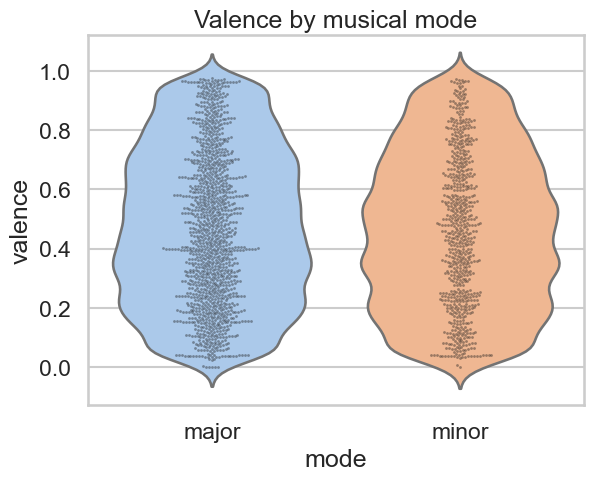

In [ ]:

sns.violinplot(data=tracks, x='mode', y='valence', inner=None, palette='pastel')
sns.swarmplot(data=tracks.sample(2000, random_state=1), x='mode', y='valence',
              color='k', size=2, alpha=0.4)
plt.title('Valence by musical mode');


Similarly, it is natural to apply box-plot on each group.

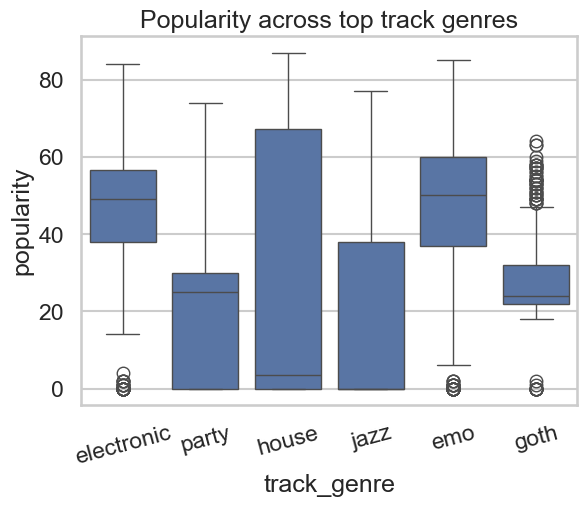

In [ ]:
# --- 2.1 Multiple categories (robust to column name) -----------------
# Find a suitable "genre" column
genre_col = next((c for c in ['playlist_genre', 'track_genre', 'genre']
                  if c in tracks.columns), None)

if genre_col:
    top_genres = tracks[genre_col].value_counts().head(6).index
    subset = tracks[tracks[genre_col].isin(top_genres)]

    sns.boxplot(data=subset, x=genre_col, y='popularity')
    plt.title(f'Popularity across top {genre_col.replace("_", " ")}s')
    plt.xticks(rotation=15)
else:
    print("No genre column found in this dataset – skipping this plot.")


### 3  Multivariate distributions

When we need to show more than two variables at once, our medium—paper or screen—limits us to two dimensions, so we must find 2-D work-arounds*. A basic tactic is to layer extra variables onto a scatterplot by mapping them to colour, size, or marker shape. We can also lay out a grid of small scatterplots (pair plots or other small-multiples) so the eye can compare patterns across panels. For truly high-dimensional data (see next section), we often compress the variables into two synthetic axes with tools such as principal-component analysis (PCA) or t-SNE and then plot those coordinates to reveal clusters or trends. Each method sacrifices some detail for clarity, but together they let us glimpse high-dimensional structure on a flat surface.

>*: 3D plots are possible but are still 3D projections on the 2D space. 

> **Tip:** When it comes to dimension in visualization, small, moderate, large, high are often context-dependent: visualization on a big projection screen can clearly handle more variables than a 4 by by inches figure in an academic article. 

#### 3.1  Pairplot 


When the number of variable is small and the sample size is also moderate, we can draw the *pairplot*, which is a matrix of scatterplots between all pairs of variables. 

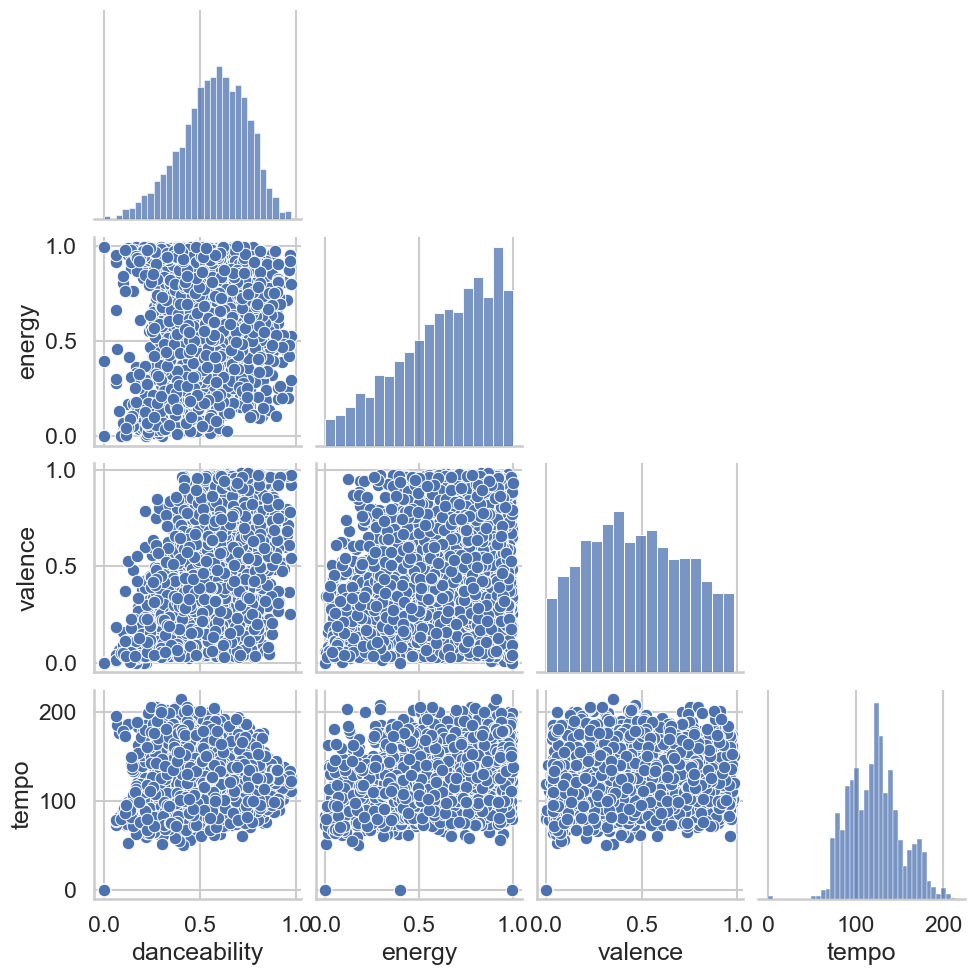

In [ ]:

small = tracks.sample(3000, random_state=0)
sns.pairplot(small[['danceability','energy','valence','tempo']], corner=True)


#### 3.2 Correlation heatmap

When the number of variables is moderate, we can draw a heatmap of correlations among all pairs of variables.

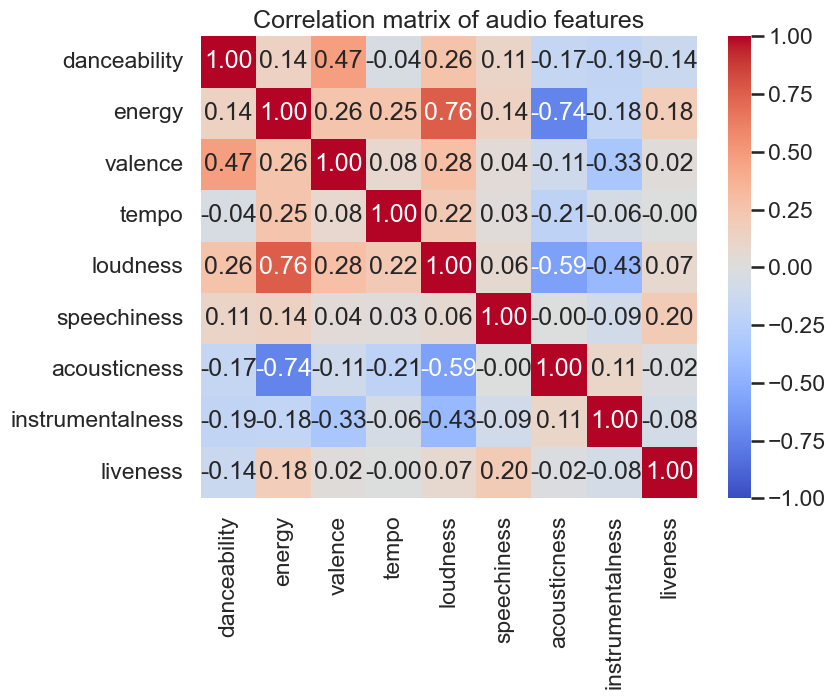

In [ ]:

num_cols = ['danceability','energy','valence','tempo','loudness','speechiness',
            'acousticness','instrumentalness','liveness']
corr = tracks[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation matrix of audio features');


#### 3.4 Interactive plots

With interactive plots, we can include at least one more feature per tuning bar. 

In [ ]:
from ipywidgets import interact, IntSlider

tracks_sample = tracks.sample(3000, random_state=0)

# Basic interactive scatter plot
@interact(min_popularity=IntSlider(value=0, min=0, max=100, step=5, description='Min popularity'))
def scatter_plot(min_popularity):
    plt.figure(figsize=(6, 4))
    subset = tracks_sample[tracks_sample["popularity"] >= min_popularity]
    sns.scatterplot(data=subset, x="danceability", y="energy", alpha=0.1, s=15)
    sns.regplot(data=subset, x="danceability", y="energy",
                scatter=False, color="red", line_kws={"linewidth": 1.5})
    plt.title(f"Energy vs Danceability  (popularity ≥ {min_popularity})")
    plt.show()


interactive(children=(IntSlider(value=0, description='Min popularity', step=5), Output()), _dom_classes=('widg…